<a href="https://colab.research.google.com/github/Sunita0096/Breast-Cancer-Diagnosis-with-Machine-Learning-and-Deep-Learning/blob/main/Breast_Cancer_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1 style="text-align: center;">Breast Cancer Diagnosis Using Machine Learning </h1>**


##Introduction
This notebook demonstrates a machine learning pipeline for diagnosing breast cancer using the Breast Cancer Wisconsin (Diagnostic) Dataset. The dataset includes 30 cell nucleus features derived from diagnostic imaging of 569 samples, categorized as malignant (M) or benign (B). These features capture properties like size, shape, texture, and complexity of cell nuclei, which are crucial for cancer detection. The objective is to preprocess the data, explore feature significance, and build classification models to predict diagnoses accurately. This project highlights practical applications of ML in healthcare diagnostics.

**Import Libraries**

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


**Load and Explore Data**

In [129]:
# Load dataset
data = pd.read_csv("/content/breastcancer.csv")

In [130]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [131]:
# Summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [132]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [133]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [134]:
data.shape

(569, 33)

In [135]:
data.size

18777

In [136]:
data.duplicated().sum()

0

In [137]:
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave_points_mean,0


There are no duplicated rows, and the null count is 0 for all features except one unnamed row with 569 null values.

Next I drop the columns 'id' and 'Unnamed: 32' as they add no value to the dataset and are unnecessary for a ML model.

In [138]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

Here, I checked the unique values in the target column:'diagnosis'

In [139]:
data["diagnosis"].nunique()

2

In [140]:
data["diagnosis"].value_counts()

,count
diagnosis,
B,357
M,212


above we can see, the "diagnosis" column has two classes: Benign (B) and Malignant (M).

In addition to that, we can see the data is imbalanced, as there are more cases of Benign (357) than Malignant (212).

In [141]:
data.dtypes

,0
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave_points_mean,float64
symmetry_mean,float64


From above we saw, that all the columns in the dataset are integers except for the “diagnosis” column, which contains object datatype. To use this column in a machine learning model, it is necessary to convert it into numeric values. Dealing with categorical data in machine learning can be tricky because most machine learning algorithms are designed to work with numerical data.

The diagnosis column contains categories like B (Benign) and M (Malignant). So, here I have used Label encoder as it is used to convert categorical data (e.g., labels or classes) into numerical values. It's simple and efficient for binary or nominal categorical data, especially when the dataset has a clear mapping of labels to numeric values.
Label encoding transforms these categories into numeric values (e.g., 0 for B and 1 for M), making the data suitable for ML models.

In [142]:
# Initialize the LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Encode the 'diagnosis' column in the dataframe
# Converts categorical values (e.g., 'B', 'M') into numerical labels (e.g., 0, 1)
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Get the mapping of encoded values to their original class labels
encoded_values = label_encoder.classes_

# Print the mapping of numerical labels to original categories
print("Mapping of encoded values for 'diagnosis':")
for index, value in enumerate(encoded_values):
    print(f"{index} - {value}")

Mapping of encoded values for 'diagnosis':
0 - B
1 - M


Next we separate the features (input variables) from the target variable (output/label). Here, diagnosis is the target variable, so it needs to be removed from the features (X).

In [143]:
X = data.drop('diagnosis', axis=1)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


y represents the target variable (output/label), which the machine learning model will predict. The features (X) are the input variables, and the target (y) is what the model learns to predict.

In [144]:
y = data['diagnosis']
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


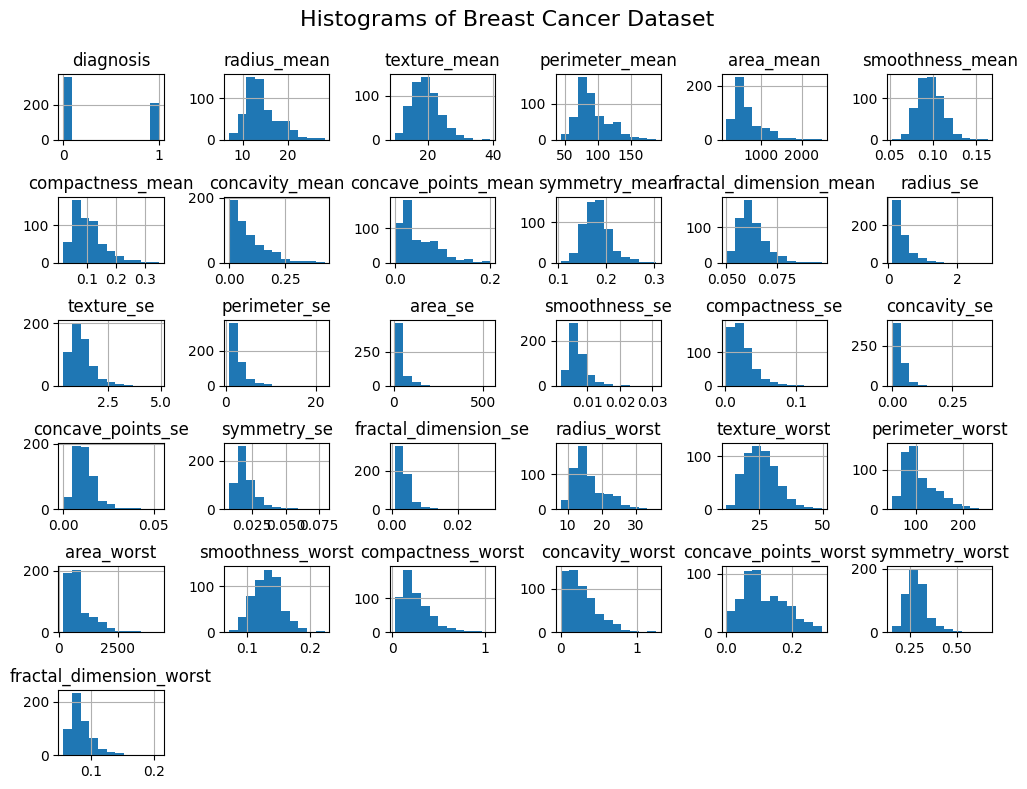

In [145]:
# Step 6: Plotting histograms for the numerical features
data.hist(bins=11, figsize=(10, 8))
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of Breast Cancer Dataset", fontsize=16)
plt.show()


Next I split the dataset into training and testing subsets.

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [147]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [148]:
# Create a StandardScaler object
sc = StandardScaler()
# Fit the scaler to the training data and transform it
X_train = sc.fit_transform(X_train)
# Transform the test data using the same scaler
X_test = sc.transform(X_test)

In [149]:
X_train

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [150]:
X_train.shape

(455, 30)

**ML Alogorithms for Training**

In [151]:
# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=6)
}

In [152]:
# Train and evaluate each classifier
accuracies = {}
for name, model in classifiers.items():
    model.fit(X_train, y_train)  # Train the model
    accuracy = model.score(X_test, y_test)  # Evaluate the model
    accuracies[name] = model.score(X_test, y_test) * 100
    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.9737
Support Vector Classifier Accuracy: 0.9825
Random Forest Accuracy: 0.9649
Decision Tree Accuracy: 0.9474
K-Nearest Neighbors Accuracy: 0.9561


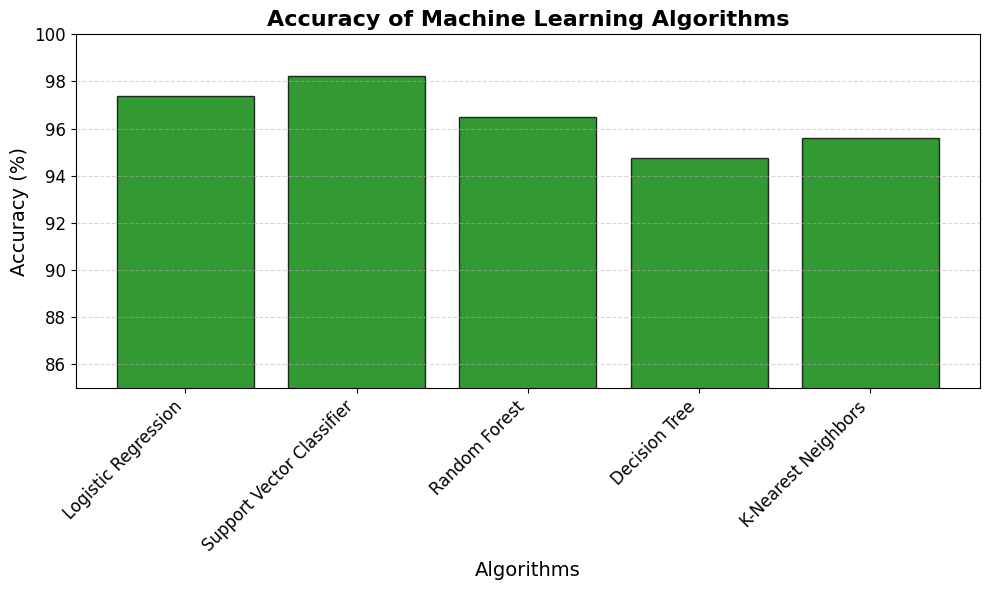

In [153]:
# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='green', alpha=0.8, edgecolor='black')

# Adding titles and labels
plt.title('Accuracy of Machine Learning Algorithms', fontsize=16, fontweight='bold')
plt.xlabel('Algorithms', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)

# Formatting y-axis and grid
plt.ylim(85, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()

Support Vector Classifier (SVC) has the highest accuracy (98.25%), making it the best-performing model in this case.

**Evaluate the ML Model Performance**

In [154]:
# Confusion Matrix
y_pred = classifiers["Support Vector Classifier"].predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[71  0]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



True Positives (TP): 41 (These are the correct predictions for class 1).
True Negatives (TN): 71 (These are the correct predictions for class 0).
False Positives (FP): 0 (Class 0 was never incorrectly predicted as class 1).
False Negatives (FN): 2 (Class 1 was incorrectly predicted as class 0).

The model does exceptionally well with this class. All 71 benign cases were predicted correctly (no false positives), and 100% recall shows that no benign case was missed. Despite the 2 false negatives in Class 1, the overall performance is excellent, and the model shows no major weaknesses.

**Performing Feature Selection**

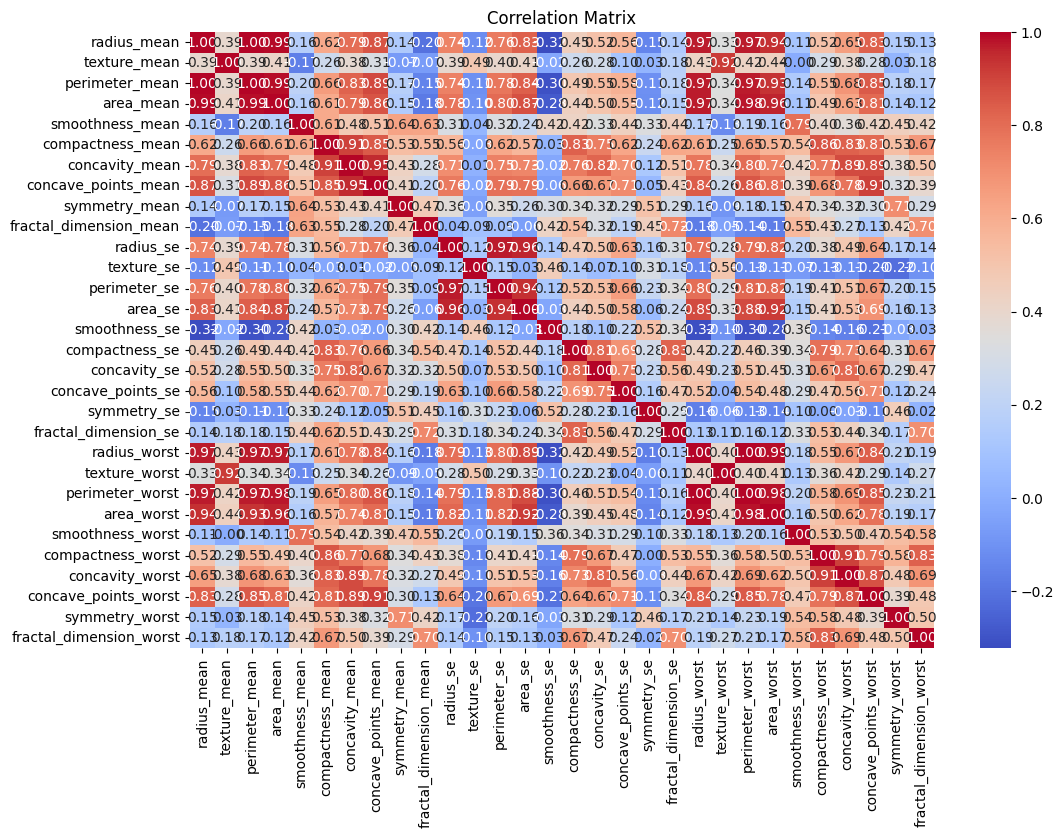

In [195]:
# Compute the correlation matrix
corr_matrix = pd.DataFrame(X_test, columns=X.columns).corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [196]:
correlated_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname = corr_matrix.columns[i]
            correlated_features.append(colname)

print("Highly correlated features (>0.9):", correlated_features)

Highly correlated features (>0.9): ['perimeter_mean', 'area_mean', 'area_mean', 'concavity_mean', 'concave_points_mean', 'perimeter_se', 'area_se', 'area_se', 'radius_worst', 'radius_worst', 'radius_worst', 'texture_worst', 'perimeter_worst', 'perimeter_worst', 'perimeter_worst', 'perimeter_worst', 'area_worst', 'area_worst', 'area_worst', 'area_worst', 'area_worst', 'area_worst', 'concavity_worst', 'concave_points_worst']


In [197]:
# Drop highly correlated features
X_filtered = X.drop(correlated_features, axis=1)

In [198]:
X_filtered

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.2060,0.07115
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.2572,0.06637
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.2218,0.07820
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.4087,0.12400


In [199]:
X_filtered.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se',
       'symmetry_se', 'fractal_dimension_se', 'smoothness_worst',
       'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [200]:
# Split the dataset into training and testing sets
X_trainf, X_testf, y_trainf, y_testf = train_test_split(X_filtered, y, test_size=0.2, random_state=42)


In [201]:
# Train and evaluate each classifier
accuracies1 = {}
for name1, model1 in classifiers.items():
    model1.fit(X_trainf, y_trainf)  # Train the model
    accuracy1 = model1.score(X_testf, y_testf)  # Evaluate the model
    accuracies1[name1] = model1.score(X_testf, y_testf) * 100
    print(f"{name1} Accuracy: {accuracy1:.4f}")


Logistic Regression Accuracy: 0.9386
Support Vector Classifier Accuracy: 0.9123
Random Forest Accuracy: 0.9474
Decision Tree Accuracy: 0.8947
K-Nearest Neighbors Accuracy: 0.9123


Deep Learning Model Training

In [161]:
input_dimension = X_train.shape[1]
print(f"input_dim: {input_dimension}")
output_dim = y_train.nunique()
print(f"output_dim: {output_dim}")

input_dim: 30
output_dim: 2


In [162]:
def get_model(arr, optimizer='adam', activation='relu', loss='binary_crossentropy', epoch=100, batch=16):
    model = Sequential()

    for i in range(len(arr)):
        if i==len(arr)-1:
            model.add(Dense(arr[i], activation='sigmoid'))
        elif i==0:
            model.add(Dense(arr[i],input_dim=input_dimension, activation=activation))
        else:
            model.add(Dense(arr[i], activation=activation))

    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epoch, batch_size=batch, validation_data=(X_test, y_test), verbose=False)
    return model

Create the model One

In [163]:
modelOne=get_model([64,16,1])
scores = modelOne.evaluate(X_test, y_test)
print("Loss: ",scores[0])
print(f"Accuracy: {scores[1]*100}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9738 - loss: 0.1880 
Loss:  0.1431330442428589
Accuracy: 97.36841917037964%


In [164]:
modelSecond=get_model([128,64,16,1])
scores = modelSecond.evaluate(X_test, y_test)
print("Loss: ",scores[0])
print(f"Accuracy: {scores[1]*100}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9794 - loss: 0.2325 
Loss:  0.17047284543514252
Accuracy: 98.24561476707458%


In [165]:
modelThird=get_model([128,64,16,1], activation='tanh')
scores = modelThird.evaluate(X_test, y_test)
print("Loss: ",scores[0])
print(f"Accuracy: {scores[1]*100}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9763 - loss: 0.1592 
Loss:  0.11159349232912064
Accuracy: 98.24561476707458%


In [166]:
modelFourth=get_model([128,64,16,1], optimizer='rmsprop')
scores = modelFourth.evaluate(X_test, y_test)
print("Loss: ",scores[0])
print(f"Accuracy: {scores[1]*100}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9738 - loss: 0.2955 
Loss:  0.2272459864616394
Accuracy: 97.36841917037964%


In [167]:
modelFifth=get_model([256,128,64,16,1])
scores = modelFifth.evaluate(X_test, y_test)
print("Loss: ",scores[0])
print(f"Accuracy: {scores[1]*100}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9738 - loss: 0.2909 
Loss:  0.2217051386833191
Accuracy: 97.36841917037964%


In [168]:
modelSixth=get_model([256,128,64,16,1], optimizer='adagrad')
scores = modelSixth.evaluate(X_test, y_test)
print("Loss: ",scores[0])
print(f"Accuracy: {scores[1]*100}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9578 - loss: 0.0705 
Loss:  0.06530612707138062
Accuracy: 96.49122953414917%


In [169]:
modelSeventh=get_model([256,128,32,16,1], loss='mean_squared_error')
scores = modelSeventh.evaluate(X_test, y_test)
print("Loss: ",scores[0])
print(f"Accuracy: {scores[1]*100}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9738 - loss: 0.0255 
Loss:  0.023562965914607048
Accuracy: 97.36841917037964%


In [170]:
modelEighth=get_model([256,128,32,16,1], activation='tanh')
scores = modelEighth.evaluate(X_test, y_test)
print("Loss: ",scores[0])
print(f"Accuracy: {scores[1]*100}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9672 - loss: 0.1711 
Loss:  0.14477421343326569
Accuracy: 96.49122953414917%


In [171]:
modelNinth=get_model([256,128,32,16,1], activation='tanh', optimizer='adagrad')
scores = modelNinth.evaluate(X_test, y_test)
print("Loss: ",scores[0])
print(f"Accuracy: {scores[1]*100}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9850 - loss: 0.0775 
Loss:  0.06251901388168335
Accuracy: 99.12280440330505%


In [172]:
modelTenth=get_model([256,128,32,16,1], activation='tanh', optimizer='adagrad', epoch=200)
scores = modelTenth.evaluate(X_test, y_test)
print("Loss: ",scores[0])
print(f"Accuracy: {scores[1]*100}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9794 - loss: 0.0788 
Loss:  0.061688512563705444
Accuracy: 98.24561476707458%


In [173]:
modelEleventh=get_model([256,128,32,16,1], activation='tanh', optimizer='adagrad', epoch=50)
scores = modelEleventh.evaluate(X_test, y_test)
print("Loss: ",scores[0])
print(f"Accuracy: {scores[1]*100}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9815 - loss: 0.0835 
Loss:  0.07431881874799728
Accuracy: 98.24561476707458%


In [174]:
modelTwelfth=get_model([256,128,32,16,1], activation='tanh', optimizer='adagrad', epoch=50, batch=8)
scores = modelTwelfth.evaluate(X_test, y_test)
print("Loss: ",scores[0])
print(f"Accuracy: {scores[1]*100}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9794 - loss: 0.0860 
Loss:  0.07425379008054733
Accuracy: 98.24561476707458%


In [175]:
modelThirteenth=get_model([256,128,32,16,1], activation='tanh', optimizer='adagrad', epoch=50, batch=32)
scores = modelThirteenth.evaluate(X_test, y_test)
print("Loss: ",scores[0])
print(f"Accuracy: {scores[1]*100}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9578 - loss: 0.0877 
Loss:  0.08117993175983429
Accuracy: 96.49122953414917%


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9738 - loss: 0.1880  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9794 - loss: 0.2325 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9763 - loss: 0.1592 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9738 - loss: 0.2955 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9738 - loss: 0.2909 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9578 - loss: 0.0705 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9738 - loss: 0.0255  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9672 - loss: 0.1711 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9850 - loss: 0.0775 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9794 - loss: 0.0788 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9815 - loss: 0.0835 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9794 - loss: 0.0860 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9578 - loss: 0.0877 


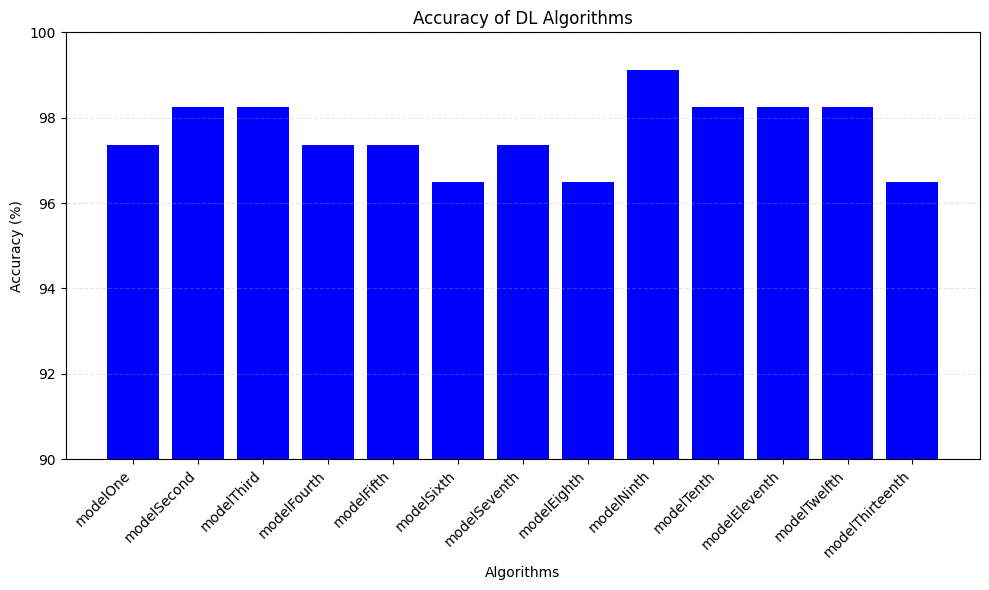

In [188]:
algorithms = ['modelOne', 'modelSecond', 'modelThird', 'modelFourth', 'modelFifth', 'modelSixth', 'modelSeventh', 'modelEighth', 'modelNinth', 'modelTenth', 'modelEleventh', 'modelTwelfth', 'modelThirteenth']
accuracies = [modelOne.evaluate(X_test, y_test)[1]*100, modelSecond.evaluate(X_test, y_test)[1]*100, modelThird.evaluate(X_test, y_test)[1]*100, modelFourth.evaluate(X_test, y_test)[1]*100, modelFifth.evaluate(X_test, y_test)[1]*100, modelSixth.evaluate(X_test, y_test)[1]*100, modelSeventh.evaluate(X_test, y_test)[1]*100, modelEighth.evaluate(X_test, y_test)[1]*100, modelNinth.evaluate(X_test, y_test)[1]*100, modelTenth.evaluate(X_test, y_test)[1]*100, modelEleventh.evaluate(X_test, y_test)[1]*100, modelTwelfth.evaluate(X_test, y_test)[1]*100, modelThirteenth.evaluate(X_test, y_test)[1]*100]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color='blue')
plt.title('Accuracy of DL Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.ylim(90, 100)  # Set the y-axis limit to 0-100 for percentage
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [177]:
FinalModel = get_model([256,128,32,16,1], activation='tanh', optimizer='adagrad', epoch=50, batch=8)
scores = FinalModel.evaluate(X_test, y_test)
print("Loss: ",scores[0])
print(f"Accuracy: {scores[1]*100}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9794 - loss: 0.0802 
Loss:  0.06902845203876495
Accuracy: 98.24561476707458%


In [187]:
import pickle

# Save the model to a .pkl file
with open('FinalModel.pkl', 'wb') as f:
    pickle.dump(FinalModel, f)


In [190]:
with open('FinalModel.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

loaded_model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9794 - loss: 0.0802  


[0.06902845203876495, 0.9824561476707458]

In [191]:
scores = FinalModel.evaluate(X_test, y_test)
print("Loss: ",scores[0])
print(f"Accuracy: {scores[1]*100}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9794 - loss: 0.0802 
Loss:  0.06902845203876495
Accuracy: 98.24561476707458%


In [192]:
predY=FinalModel.predict(np.array(X_test))
predY=np.round(predY).astype(int).reshape(1,-1)[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


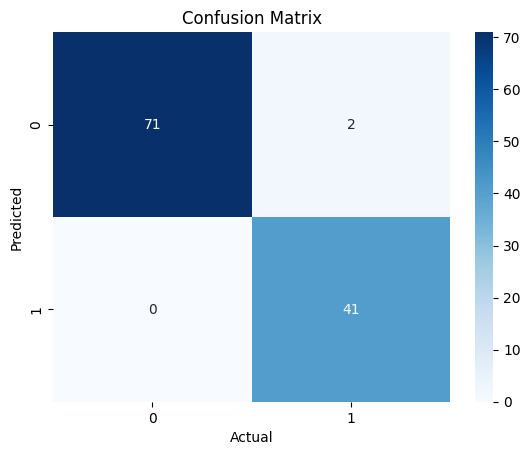

In [193]:
m = confusion_matrix(predY, y_test)

sns.heatmap(m, annot=True, cmap="Blues", fmt="d")

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [194]:
tn, fn, fp, tp = m.ravel()

specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

specificity_percent = specificity * 100
sensitivity_percent = sensitivity * 100

print(f"Specificity: {specificity_percent:.2f}%")
print(f"Sensitivity: {sensitivity_percent:.2f}%")

Specificity: 100.00%
Sensitivity: 95.35%
